In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


#### Codici utili per tutti gli algortimi 

In [2]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [3]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [4]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

Importazione dati

In [5]:
community_path = "../Dataset FFF/Community_task/"

In [6]:
path = "../Dataset FFF/"

In [7]:
path_graph = '../Dataset FFF/Graph_data/'

In [8]:
G = nx.read_graphml(path_graph+'Real_Network.graphml')

## 6 -  Kcliques

In [9]:
import random
k = 9000
sampled_nodes = random.sample(G.nodes, k)
sampled_graph = G.subgraph(sampled_nodes)
k_num = ensemble.Parameter(name="k", start=2, end=8, step=1)

k_coms, scoring = ensemble.random_search(graph=sampled_graph, method=algorithms.kclique,
                                                       parameters=[k_num],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                       instances=3, aggregate=max)

In [10]:
with open('k.pickle', 'wb') as f:
    pickle.dump(k_coms, f)

In [11]:
with open('k.pickle', 'rb') as f:
    k_coms = pickle.load(f)

In [12]:
print(print_bold_str("Average Internal Degree:"), k_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), k_coms.internal_edge_density())
print(print_bold_str("Conductance:"), k_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), k_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), k_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), k_coms.modularity_density())
print(print_bold_str("Z Modularity:"), k_coms.z_modularity())

Average Internal Degree: FitnessResult(min=4.0, max=17.832857142857144, score=4.908787251395947, std=1.5673438170677974)
Internal Edge Density: FitnessResult(min=0.004246929541047188, max=1.0, score=0.9924045345493846, std=0.05332754237762838)
Conductance: FitnessResult(min=0.11600788414554983, max=0.998104445076296, score=0.9814553340144405, std=0.08170287053426331)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6797130302196109, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.06670152882113399, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-666510.7831607286, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=nan, std=None)


In [13]:
print(print_bold_str("N_Community:"), len(k_coms.communities))

max_com_len = 0
for com in k_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

N_Community: 506
Max_Dim_Community: 4200


In [14]:
k_tuple = [tuple(x) for x in k_coms.communities]

{'4200': 1, '21': 1, '14': 2, '13': 3, '12': 3, '11': 4, '10': 7, '9': 9, '8': 28, '7': 60, '6': 95, '5': 293}


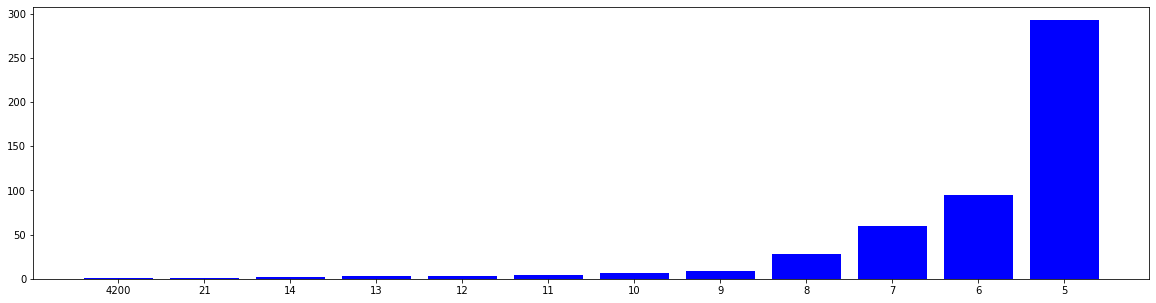

In [17]:
plot_communities_dimentions(k_tuple)

In [18]:
def covg_overlap(G, community, name):
    print(f'{name} coverage:', community.node_coverage)
    print(f'{name} overlap:', community.overlap) 
    print(f'{name} avg degree:', evaluation.average_internal_degree(G, community))
    print("*******")

In [19]:
covg_overlap(sampled_graph, k_coms, "K-Cliques")

K-Cliques coverage: 0.6373333333333333
K-Cliques overlap: True
K-Cliques avg degree: FitnessResult(min=4.0, max=17.832857142857144, score=4.908787251395947, std=1.5673438170677974)
*******
